In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


### Load the data

In [2]:
root_path = '../4-igb7-mbondi'  # The path to the directory containing the systems

igbs = ['igb7']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=2501, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = (df['Frame']-2501)/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
            df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
            df['igb'] = igb
            df['ff'] = ff
            df['ffigb'] = '{0} {1}'.format(ff, igb)
            df['igbff'] = '{0} {1}'.format(igb, ff)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0   2501              0.848         0.0000     90.270968              NaN   
1   2502              0.818         0.0001     87.077419              NaN   
2   2503              0.879         0.0002     93.570968              NaN   
3   2504              0.667         0.0003     71.003226              NaN   
4   2505              0.848         0.0004     90.270968              NaN   

    igb    ff      ffigb      igbff  
0  igb7  ff94  ff94 igb7  igb7 ff94  
1  igb7  ff94  ff94 igb7  igb7 ff94  
2  igb7  ff94  ff94 igb7  igb7 ff94  
3  igb7  ff94  ff94 igb7  igb7 ff94  
4  igb7  ff94  ff94 igb7  igb7 ff94  


In [3]:
print(df_total.tail())

       Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
19691  22192              0.818         1.9691     87.077419        84.868974   
19692  22193              0.848         1.9692     90.270968        84.875361   
19693  22194              0.818         1.9693     87.077419        84.901123   
19694  22195              0.788         1.9694     83.883871        84.888348   
19695  22196              0.000         1.9695      0.000000        84.720581   

        igb       ff         ffigb         igbff  
19691  igb7  ff15ipq  ff15ipq igb7  igb7 ff15ipq  
19692  igb7  ff15ipq  ff15ipq igb7  igb7 ff15ipq  
19693  igb7  ff15ipq  ff15ipq igb7  igb7 ff15ipq  
19694  igb7  ff15ipq  ff15ipq igb7  igb7 ff15ipq  
19695  igb7  ff15ipq  ff15ipq igb7  igb7 ff15ipq  


DSSP value of the fully helical version of the peptide:

In [4]:
90.9*33/31

96.76451612903227

### Helicity time series

In [ ]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="ffigb", col_wrap=13, hue="ff", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity3_2.pdf')
plt.savefig('./plots/helicity3_2.png', dpi=300)
plt.show()

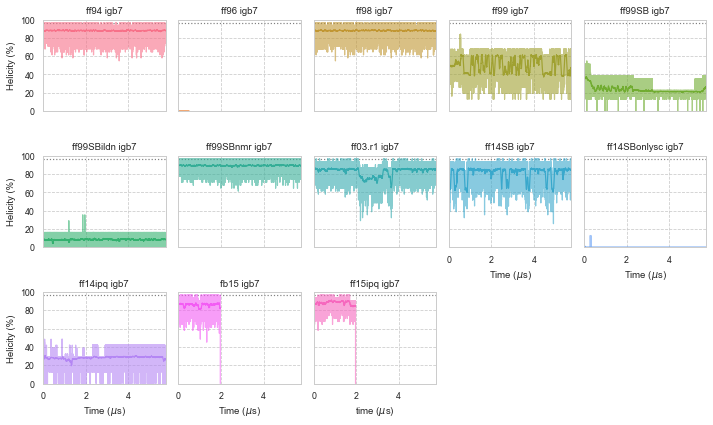

In [5]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="ffigb", col_wrap=5, hue="ffigb", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/igb7_mbondi_helicity3_1.pdf')
plt.savefig('./plots/igb7_mbondi_helicity3_1.png', dpi=300)
plt.show()

### Helicity box plots

In the first plot, wiskers incorporate all the data:

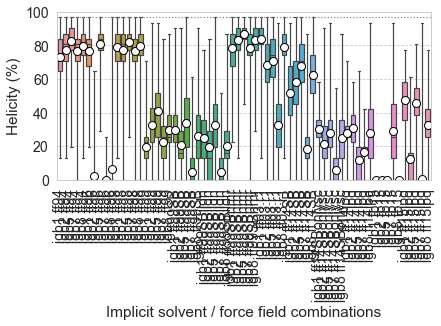

In [50]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(6.4, 4.8))

ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_total, fliersize=2,whis=[0, 100],
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"8"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()

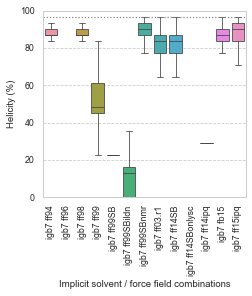

In [8]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(3.6, 4.2))


ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_total, fliersize=0, linewidth=0.8,
               showmeans=False,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"4"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()
plt.savefig('./plots/igb7_mbondi_helicity_boxplot3_1.pdf')
plt.savefig('./plots/igb7_mbondi_helicity_boxplot3_1.png', dpi=300)

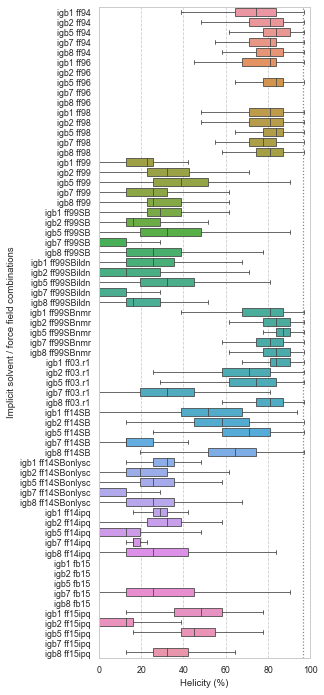

In [63]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(4.6,9.75))


ax=sns.boxplot(y='igbff', x='Helicity (%)', data=df_total, fliersize=0, linewidth=0.8,
               showmeans=False, orient="h",
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"4"})
# ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
# plt.gca().invert_yaxis()
ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
plt.axvline(x=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()
plt.savefig('./plots/helicity_boxplot3_2.pdf')
plt.savefig('./plots/helicity_boxplot3_2.png', dpi=300)

#### Average helicity and std dev

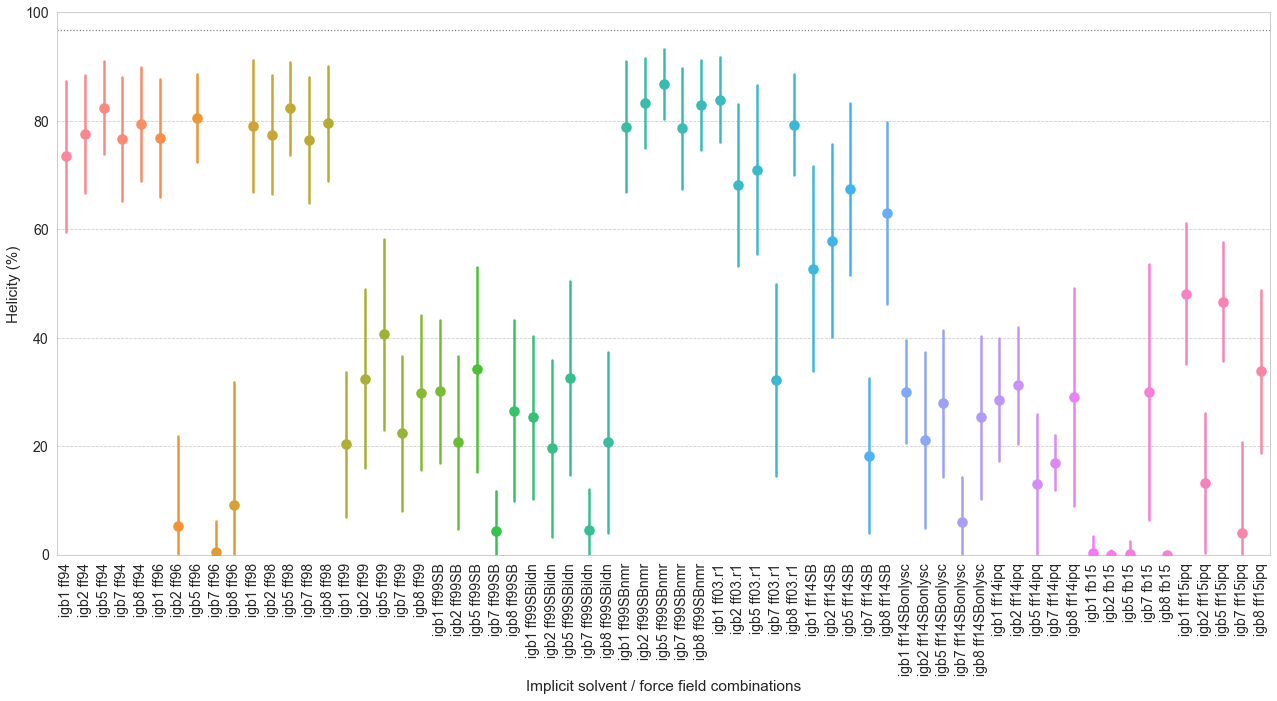

In [30]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(18, 10))

ax=sns.pointplot(x='igbff', y='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="o", scale = 1.5, errwidth=2.5)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd.png', dpi=400)

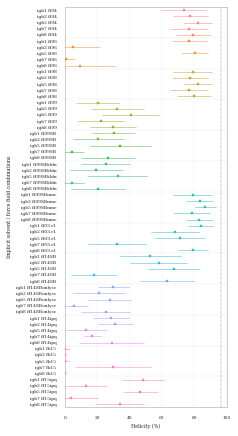

In [68]:
sns.set(context='paper', style='whitegrid', palette='deep', font='serif',\
        font_scale=0.5, rc={'grid.linestyle': '--','grid.linewidth': '0.2'})

fig, axes = plt.subplots(figsize=(3.25, 6))

ax=sns.pointplot(y='igbff', x='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="s", orient="h", scale=0.25, errwidth=0.5)

ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
ax.yaxis.grid(True, which='minor')

plt.axvline(x=96.76, ls='-.', c=".5",lw=0.4 ) # 90.9*33/31

plt.axhline(y=4.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=9.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=14.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=19.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=24.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=29.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=34.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=39.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=44.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=49.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=54.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=59.5, ls='--', c=".75",lw=0.2 )

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd_2.png', dpi=400)

In [ ]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(18, 10))

g=sns.catplot(x='ff', y='Helicity (%)', data=df_total, hue="igb", kind='bar')
#                join=False, ci="sd",
#                 markers="o", scale = 1.5, errwidth=2.5)

# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# g.set_ylim([0, 100])  
# g.set_xlabel('Implicit solvent / force field combinations')
# g.get_legend().remove()
# plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
# plt.savefig('./plots/helicity_mean_sd_3.png', dpi=400)

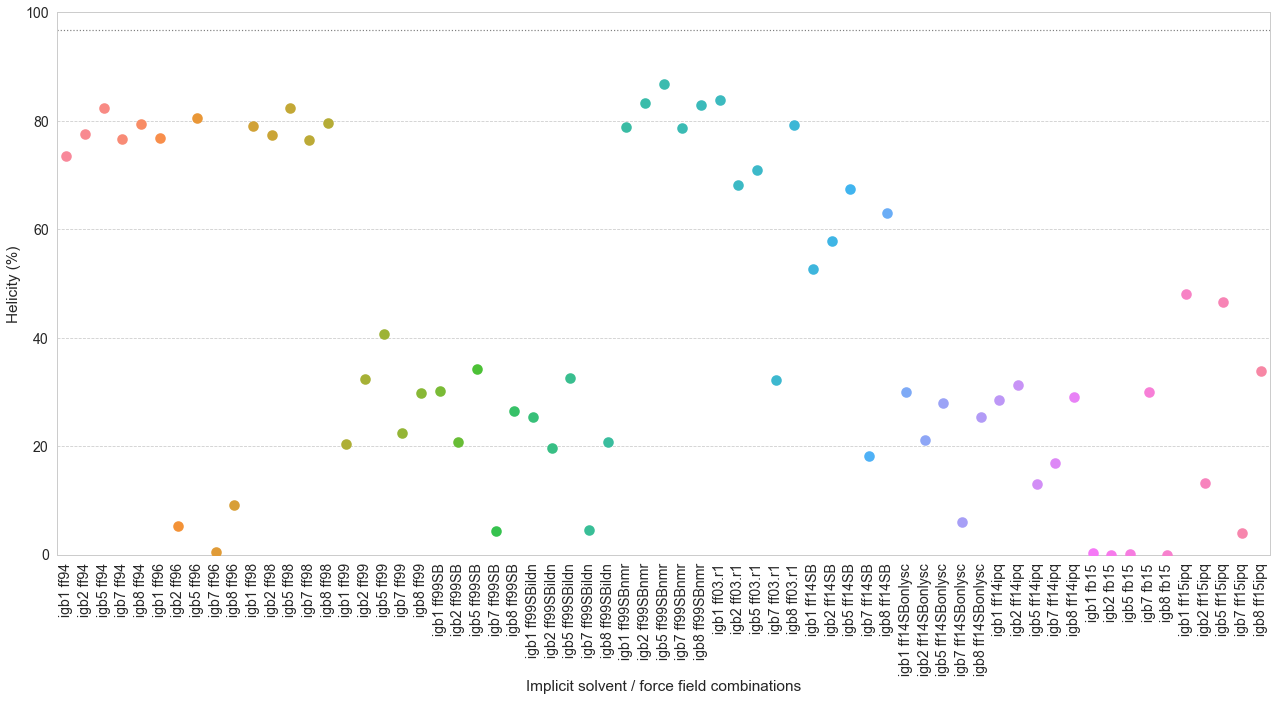

In [66]:
sns.set(context='paper', style='whitegrid', palette='deep', font='serif',\
        font_scale=0.5, rc={'grid.linestyle': '--','grid.linewidth': '0.2'})

fig, axes = plt.subplots(figsize=(3.25, 6))

ax=sns.pointplot(y='igbff', x='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="s", orient="h", scale=0.25, errwidth=0.5)

ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
ax.yaxis.grid(True, which='minor')

plt.axvline(x=96.76, ls='-.', c=".5",lw=0.4 ) # 90.9*33/31

plt.axhline(y=4.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=9.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=14.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=19.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=24.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=29.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=34.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=39.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=44.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=49.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=54.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=59.5, ls='--', c=".75",lw=0.2 )

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd_4.png', dpi=400)